## Installation de spark-cluster & findspark, pyspark 

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz

# unzip the spark file to the current folder
!tar xf spark-3.2.0-bin-hadoop2.7.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"


# install findspark using pip
!pip install -q findspark

# install pyspark
!pip install pyspark

# importation et initialisation de Spark

In [2]:
import findspark 
findspark.init()

## importer PySpark et initialiser SparkContext

In [3]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("actions").setMaster("local[*]")
sc = SparkContext(conf = conf)

## Appliquer la Transformation MAP()
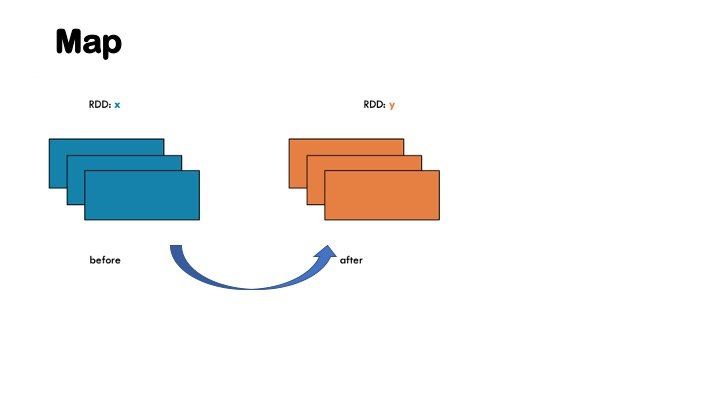

In [4]:
num = sc.parallelize([2,9,7,4,3,1])
num.map(lambda a : a*4).collect()

[8, 36, 28, 16, 12, 4]

## Application la transformation flatMap()
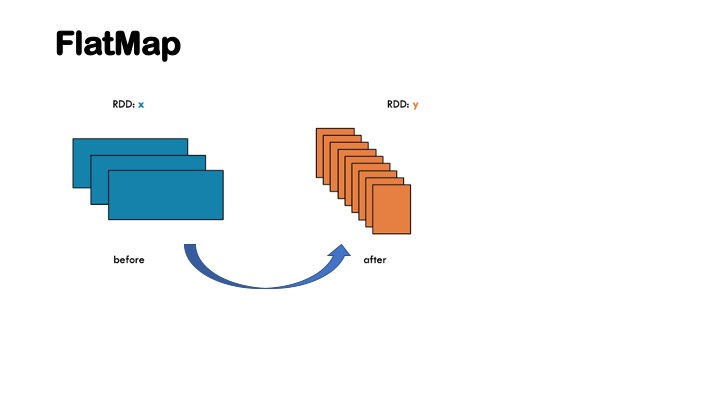

In [5]:
textRdd=sc.textFile('data/text_ex1.txt')
wordRdd=textRdd.flatMap(lambda x: x.split(" "))
wordRdd.collect()

['Duis',
 'sodales',
 'odio',
 'eget',
 'nunc',
 'cursus,',
 'iaculis',
 'rutrum',
 'metus',
 'consectetur.',
 'Praesent',
 'non',
 'sem',
 'urna.',
 'Aliquam',
 'nec',
 'efficitur',
 'justo,',
 'egestas',
 'blandit',
 'sem.',
 'Curabitur',
 'est',
 'mi,',
 'imperdiet',
 'in',
 'mauris',
 'vel,',
 'condimentum',
 'hendrerit',
 'lorem.',
 'Donec',
 'nec',
 'neque',
 'nibh.',
 'Suspendisse',
 'potenti.',
 'Praesent',
 'eget',
 'venenatis',
 'magna.',
 'Curabitur',
 'non',
 'rutrum',
 'velit,',
 'eu',
 'aliquam',
 'nulla.',
 'Cras',
 'est',
 'sapien,',
 'dictum',
 'quis',
 'varius',
 'in,',
 'mattis',
 'eleifend',
 'velit.',
 'Etiam',
 'ut',
 'fermentum',
 'diam.',
 'Phasellus',
 'maximus',
 'velit',
 'non',
 'sollicitudin',
 'aliquam.',
 'Vestibulum',
 'vulputate',
 'vel',
 'quam',
 'id',
 'imperdiet.',
 'Maecenas',
 'luctus',
 'lectus',
 'id',
 'diam',
 'cursus',
 'finibus.',
 '',
 'Cras',
 'scelerisque',
 'mi',
 'quis',
 'odio',
 'euismod,',
 'pellentesque',
 'eleifend',
 'elit',
 'int

## Application la transformation filter()
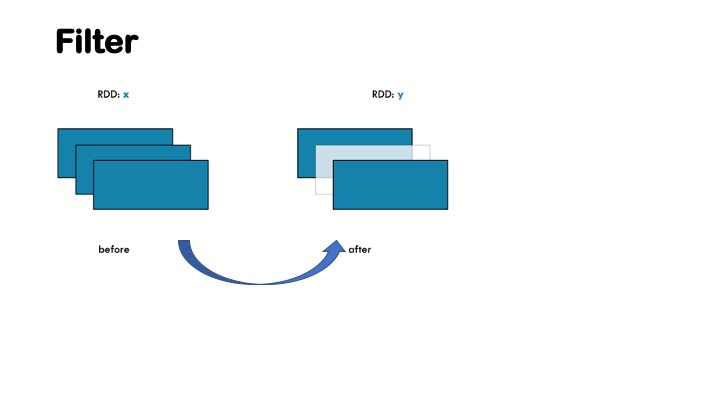

In [6]:
wordRdd.filter(lambda x : "c" in x).collect()


['nunc',
 'cursus,',
 'iaculis',
 'consectetur.',
 'nec',
 'efficitur',
 'condimentum',
 'Donec',
 'nec',
 'dictum',
 'sollicitudin',
 'Maecenas',
 'luctus',
 'lectus',
 'cursus',
 'scelerisque',
 'arcu,',
 'scelerisque',
 'nec,',
 'cursus',
 'Nunc',
 'ac',
 'commodo',
 'vehicula,',
 'luctus',
 'nunc,',
 'nec',
 'consectetur',
 'hac',
 'dictumst.',
 'facilisis',
 'consequat',
 'vehicula',
 'congue',
 'faucibus',
 'ac.',
 'nec.',
 'convallis,',
 'tincidunt',
 'arcu',
 'facilisis',
 'Maecenas',
 'consectetur',
 'arcu',
 'Donec',
 'nec',
 'commodo',
 'consequat',
 'nunc',
 'Nunc',
 'dictum,',
 'ac',
 'orci',
 'nunc.',
 'Donec',
 'lectus.',
 'tincidunt',
 'luctus',
 'nec',
 'sollicitudin,',
 'accumsan',
 'dictum.',
 'lacinia',
 'iaculis',
 'ullamcorper',
 'ac',
 'condimentum,',
 'consectetur',
 'ultrices',
 'nunc',
 'lectus.',
 'Nunc',
 'accumsan',
 'cursus,',
 'nunc',
 'lacus',
 'ullamcorper',
 'orci.',
 'lectus',
 'dictum',
 'scelerisque',
 'convallis',
 'ac.',
 'ullamcorper',
 'Donec',


## La Transformation distinct()
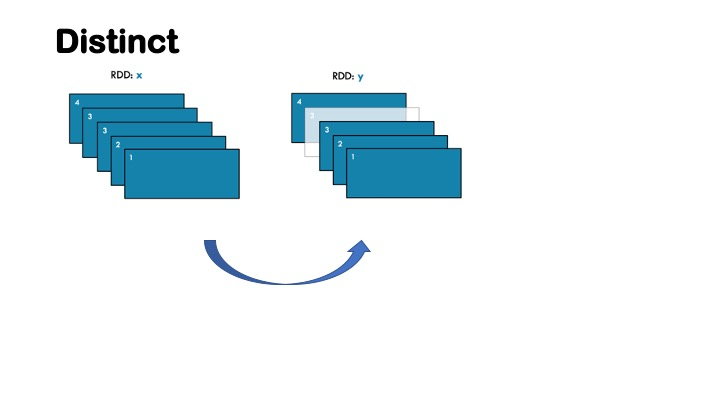

In [7]:
wordRdd.count()

13507

In [8]:
wordRdd.distinct().count()

466

## La Transformation union()

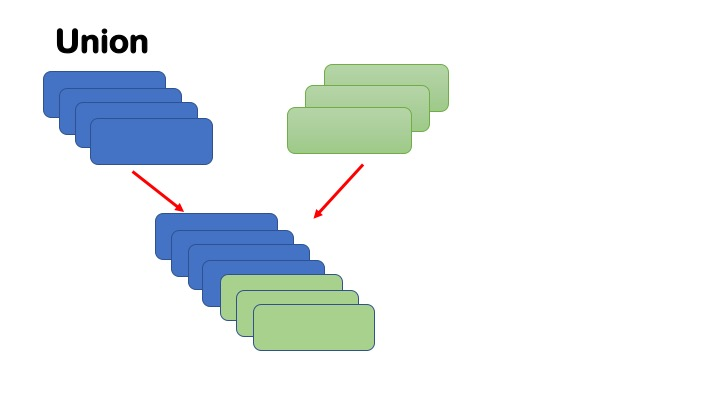

In [9]:
numRdd1 = sc.parallelize([1,7,9,4,10,15])
numRdd2 = sc.parallelize([2,1,5,10])
numRdd2.union(numRdd1).collect()

[2, 1, 5, 10, 1, 7, 9, 4, 10, 15]

## La Transformation reduceByKey
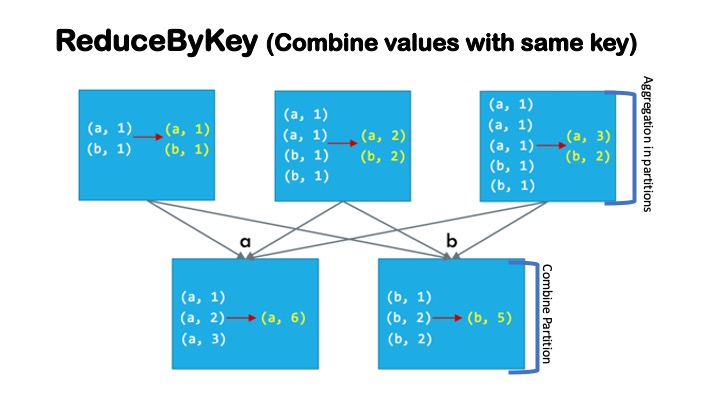

In [10]:
data = sc.parallelize([(1,2),(3,4),(3,6),(3,4)])
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [11]:
data.reduceByKey(lambda x, y : x+y).collect()

[(1, 2), (3, 14)]

## La Transformation mapValues()

In [13]:
data = sc.parallelize([(1,2),(3,4),(3,6),(3,4)])
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [14]:
data.mapValues(lambda x: x/2).collect()

[(1, 1.0), (3, 2.0), (3, 3.0), (3, 2.0)]